# Sales Analysis 

In [89]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [90]:
# Merging the 12 months of sales data into one CSV file


files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+ file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)    

In [91]:
# Reading in updated Dataframe 

data = pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [92]:
data.shape

(186850, 6)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [94]:
data.duplicated().sum()

1162

# Cleaning the data

In [95]:
# Looking for Null values

data[data.isnull().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Calculating Null percentage

null_percentage = (data.isnull().sum()/ data.shape[0])*100
null_percentage

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [97]:
# Dropping Null value because of very low null percentage in data

data.dropna(inplace = True)
data.shape

(186305, 6)

In [98]:
# Removing duplicates from the data

data = data.drop_duplicates()

In [99]:
data = data[data['Order Date'].str[0:2] != 'Or']  
    

In [100]:
# Converting column to right datatype

data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

### Adding a month column

In [101]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Adding sales and city column

In [102]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 

In [103]:
data['City'] = data['Purchase Address'].apply(lambda x : x.split(',')[1])
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


### Analysing data

In [104]:
# Month with highest sales

results = data.groupby('Month').sum().reset_index()
results

,Month,Quantity Ordered,Price Each,Sales
0,1,10893,1810924.81,1821413.16
1,2,13431,2186940.38,2200078.08
2,3,16979,2789084.64,2804973.35
3,4,20536,3366218.76,3389217.98
4,5,18653,3133134.61,3150616.23
5,6,15234,2560503.50,2576280.15
6,7,16054,2631225.12,2646461.32
7,8,13429,2226963.90,2241083.37
8,9,13091,2081897.65,2094465.69
9,10,22669,3713608.80,3734777.86


<AxesSubplot:xlabel='Month', ylabel='Sales'>

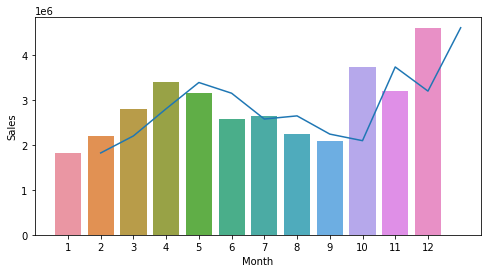

In [105]:
plt.figure(figsize = (8,4))
sns.barplot(y = results['Sales'], x = results['Month'])
sns.lineplot(y = results['Sales'], x = results['Month'])

In [106]:
# City with highest sales

In [107]:
city_max_sales = data.groupby('City').sum().reset_index()

<AxesSubplot:xlabel='City', ylabel='Sales'>

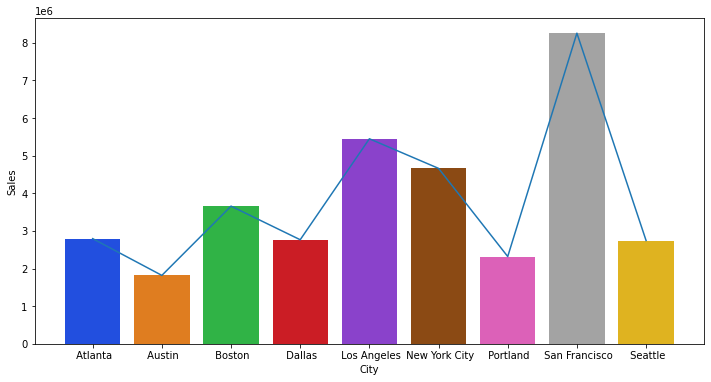

In [108]:

plt.figure(figsize = (12,6))
sns.barplot(y = 'Sales',x = 'City',data = city_max_sales, palette = 'bright')
sns.lineplot(y = 'Sales',x = 'City',data = city_max_sales)


In [109]:
# What time(hour) does maximum sales occur 


data['Order Date'] = pd.to_datetime(data['Order Date'])

data['Hour'] = data['Order Date'].dt.hour
data['Minutes'] = data['Order Date'].dt.minute
data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


In [110]:
res = data.groupby('Hour').count().reset_index()

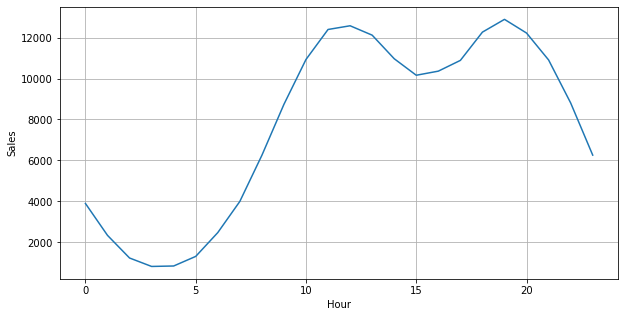

In [111]:
plt.figure(figsize = (10,5))
sns.lineplot(res.Hour, res.Sales)
plt.grid()


# My suggestion would be from 11:00 AM (OR) 7:00 PM

In [112]:
# Products that are usually sold together

In [113]:

df = data[data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

In [114]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
df1 = pd.DataFrame(count.most_common(10))
df1.columns = ['Things bought together','Ocurrence']

<AxesSubplot:xlabel='Ocurrence', ylabel='Things bought together'>

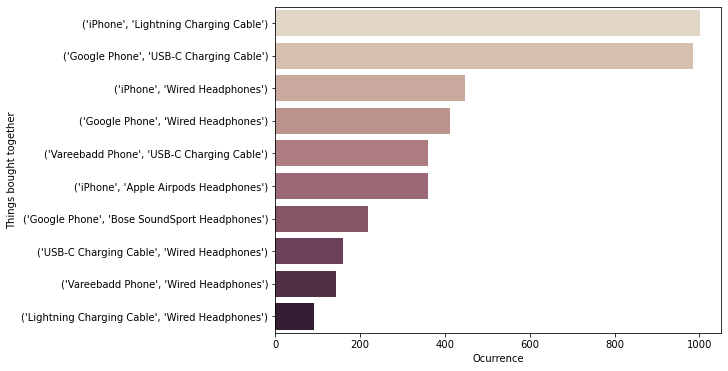

In [115]:
plt.figure(figsize = (8,6))

sns.barplot(data = df1, y = "Things bought together", x = "Ocurrence", palette="ch:.25")

In [116]:
# Most products sold and why?

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


In [117]:
df2 = data.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by = 'Quantity Ordered',ascending = False)


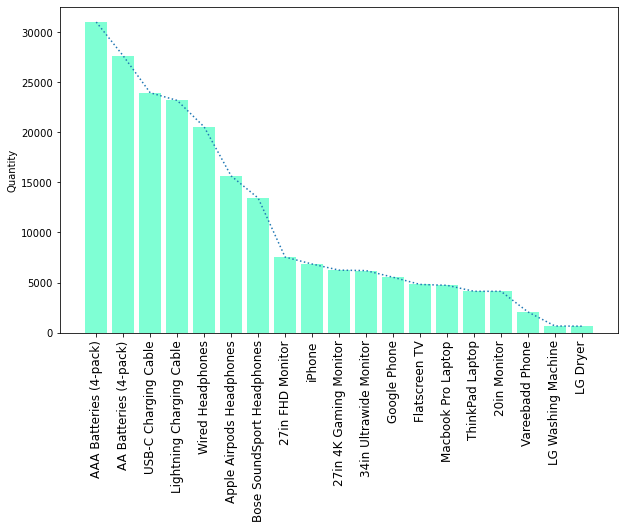

In [128]:
plt.figure(figsize=(10,6))

plt.bar(df2['Product'],df2['Quantity Ordered'], color = 'aquamarine')

plt.plot(df2['Product'],df2['Quantity Ordered'], linestyle = 'dotted')

plt.ylabel('Quantity')

plt.xticks(df2.Product, rotation = 'vertical', size = 12)

plt.show()